# ***An Exploratory Analysis of Rat Sightings In NYCs 5 Boroughs:***

 Creation of sets for further EDA
Preliminary: *Are the reports of rats equally distributed throughout the boroughs?*

>> Does one borough have more reports of rats per population than the other?
where are the most reports by year, month....

>>

Is there a correlation between the frequency of DSNY collection and the affect on the number of sightings?

Types of collections and the reported sightings.

sightings to frequency
sightings to population



Possible Further exploration into:

>Sightings to vendor

Litter baskets.

>Refuge stats compared to US

>Employment stats and truck violations.


#Reported Sightings
---Original data sourced from:

 https://data.cityofnewyork.us/Social-Services/Rat-Sightings/3q43-55fe


> *additional sources added upon completion of ReadMe.txt master repository creation*


###Initial files joined/cleaned with Tableau Prep

==> step1_ratsightings = (Modified_Zip_Code_Tabulation_Areas__MODZCTA_.csv
Rat_Sightings.csv)


==> dsny_frequency = (DSNY_Districts, DSNY_Frequencies, NYC_Community_Board_dist,Modified_Zip_Code_Tabulation_Areas__MODZCTA_.csv)






Neighborhoods to zips

* Bronx Central Bronx 10453, 10457, 10460
* Bronx Park and Fordham 10458, 10467, 10468
* High Bridge and Morrisania 10451, 10452, 10456
* Hunts Point and Mott Haven 10454, 10455, 10459, 10474
* Kingsbridge and Riverdale 10463, 10471
* Northeast Bronx 10466, 10469, 10470, 10475
* Brooklyn Central Brooklyn 11212, 11213, 11216, 11233, 11238
* Southwest Brooklyn 11209, 11214, 11228
* Borough Park 11204, 11218, 11219, 11230
* Canarsie and Flatlands 11234, 11236, 11239
* Southern Brooklyn 11223, 11224, 11229, 11235
* Northwest Brooklyn 11201, 11205, 11215, 11217, 11231
* Flatbush 11203, 11210, 11225, 11226
* East New York and New Lots 11207, 11208
* Greenpoint 11211, 11222
* Sunset Park 11220, 11232
* Bushwick and Williamsburg 11206, 11221, 11237
* Manhattan Central Harlem 10026, 10027, 10030, 10037, 10039
* Chelsea and Clinton 10001, 10011, 10018, 10019, 10020, 10036
* East Harlem 10029, 10035
* Gramercy Park and Murray Hill 10010, 10016, 10017, 10022
* Greenwich Village and Soho 10012, 10013, 10014
* Lower Manhattan 10004, 10005, 10006, 10007, 10038, 10280
* Lower East Side 10002, 10003, 10009
* Upper East Side 10021, 10028, 10044, 10065, 10075, 10128
* Upper West Side 10023, 10024, 10025
* Inwood and Washington Heights 10031, 10032, 10033, 10034, 10040
* Queens Northeast Queens 11361, 11362, 11363, 11364
* North Queens 11354, 11355, 11356, 11357, 11358, 11359, 11360
* Central Queens 11365, 11366, 11367
* Jamaica 11412, 11423, 11432, 11433, 11434, 11435, 11436
* Northwest Queens 11101, 11102, 11103, 11104, 11105, 11106
* West Central Queens 11374, 11375, 11379, 11385
* Rockaways 11691, 11692, 11693, 11694, 11695, 11697
* Southeast Queens 11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429
* Southwest Queens 11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421
* West Queens 11368, 11369, 11370, 11372, 11373, 11377, 11378
* Staten Island Port Richmond 10302, 10303, 10310
* South Shore 10306, 10307, 10308, 10309, 10312
* Stapleton and St. George 10301, 10304, 10305
* Mid-Island 10314

#Import

In [1]:
import os
import requests
import glob
import pandas as pd
!pip install geopandas
import geopandas as gpd
import numpy as np
import re # flexable way to search for matching text in strings Regular Expressions
import seaborn as sns # plotting and graphing, built upon the matplotlib library.
import matplotlib.pyplot as plt
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#import geopy #ploting by location longitude and latitude
from math import pi
#from geopy.geocoders import Nominatim as nm
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()
#these populated on their own
from zmq.constants import THREAD_NAME_PREFIX
from pandas.core.groupby import groupby

#additional imports from notbook reference
import plotly as ply
import plotly.express as px
import plotly.io as pio
import scipy as sc
import sympy as sy
import matplotlib as matplot
import statistics as stat
### some imports are yet to be used...cleaning up and still exploring past analysis usage.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [91]:
# Read the csv(s)

missing_values=['nan','-', '']
rats = pd.read_csv('/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/step1_ratsightings.csv', na_values = missing_values)
dsny = pd.read_csv('/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/dsny_frequency.csv', na_values = missing_values)
#Unique Key as Index (after import check for duplicates then index unique key after sort of key and created date.)
#drop false leaves the index columns in when reindexing

#EDA DSNY

In [92]:
print('Info:', dsny.info())
print('top 5 rows:', dsny.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   post_code            606 non-null    int64  
 1   modzcta              606 non-null    int64  
 2   label                606 non-null    object 
 3   zcta                 606 non-null    object 
 4   district             606 non-null    object 
 5   districtcode         606 non-null    int64  
 6   section              606 non-null    object 
 7   community_board      606 non-null    object 
 8   council_district     606 non-null    int64  
 9   schedulecode         606 non-null    object 
 10  neighborhoods        606 non-null    object 
 11  nta                  606 non-null    object 
 12  cb_office_address    606 non-null    object 
 13  pop_est              606 non-null    int64  
 14  frequency            606 non-null    object 
 15  bulk_day1            606 non-null    obj

In [93]:
print('Rows, Columns:', dsny.shape)
#610, 31

Rows, Columns: (606, 34)


##Cleaning DSNY

In [94]:
dsny1 = dsny.drop_duplicates()
dsny1.shape == dsny.shape #(80475, 24)  (80481, 24)

True

In [95]:
dsny1.sort_values(by=['schedulecode','modzcta', 'post_code']).head(5)

,post_code,modzcta,label,zcta,district,districtcode,section,community_board,council_district,schedulecode,...,bulk_frequency,ObjectID,SHAPE_Area-1,SHAPE_Length-1,Latitude,Longitude,Location Point,multipolygon-1,census_tract,GlobalID
390,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN011,Community Board 1,1,1011A,...,"Mon, Wed, Fri",1,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
392,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN011,Community Board 1,1,1011B,...,"Tue, Thu, Sat",2,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
284,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN013,Community Board 1,1,1013A,...,"Mon, Wed, Fri",3,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
227,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN013,Community Board 1,1,1013B,...,"Tue, Thu, Sat",4,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
560,10012,10012,10012,10012,MN02,102,MN021,Community Board 2,1,1021A,...,"Mon, Wed, Fri",5,0.000374,0.112141,40.727881,-73.998557,POINT (-73.998557 40.727881),MULTIPOLYGON (((-73.99684138499998 40.73736915...,5501,{9A68C37A-9489-4BCE-8D8C-580117BF1A87}


In [96]:
dsny1_sorted = pd.DataFrame(dsny1.sort_values(by=['schedulecode','modzcta', 'post_code'], ascending=True))

In [97]:
dsny1_sorted.reset_index(drop=True)

,post_code,modzcta,label,zcta,district,districtcode,section,community_board,council_district,schedulecode,...,bulk_frequency,ObjectID,SHAPE_Area-1,SHAPE_Length-1,Latitude,Longitude,Location Point,multipolygon-1,census_tract,GlobalID
0,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN011,Community Board 1,1,1011A,...,"Mon, Wed, Fri",1,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
1,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN011,Community Board 1,1,1011B,...,"Tue, Thu, Sat",2,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
2,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN013,Community Board 1,1,1013A,...,"Mon, Wed, Fri",3,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
3,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN013,Community Board 1,1,1013B,...,"Tue, Thu, Sat",4,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
4,10012,10012,10012,10012,MN02,102,MN021,Community Board 2,1,1021A,...,"Mon, Wed, Fri",5,0.000374,0.112141,40.727881,-73.998557,POINT (-73.998557 40.727881),MULTIPOLYGON (((-73.99684138499998 40.73736915...,5501,{9A68C37A-9489-4BCE-8D8C-580117BF1A87}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,10309,10309,10309,10309,SI03,503,SI037,Community Board 3,51,5037D,...,"Tue, Fri",606,0.005915,0.575665,40.541857,-74.206175,POINT (-74.206175 40.541857),MULTIPOLYGON (((-74.20072777399997 40.57933312...,20801,{39F3B701-E1E4-4D24-9E7A-D12AF02CD8DF}
602,10309,10309,10309,10309,SI03,503,SI037,Community Board 3,51,5037E,...,"Wed, Sat",607,0.005915,0.575665,40.541857,-74.206175,POINT (-74.206175 40.541857),MULTIPOLYGON (((-74.20072777399997 40.57933312...,20801,{39F3B701-E1E4-4D24-9E7A-D12AF02CD8DF}
603,10309,10309,10309,10309,SI03,503,SI038,Community Board 3,51,5038C,...,"Mon, Thu",608,0.005915,0.575665,40.541857,-74.206175,POINT (-74.206175 40.541857),MULTIPOLYGON (((-74.20072777399997 40.57933312...,20801,{39F3B701-E1E4-4D24-9E7A-D12AF02CD8DF}
604,10309,10309,10309,10309,SI03,503,SI038,Community Board 3,51,5038D,...,"Tue, Fri",609,0.005915,0.575665,40.541857,-74.206175,POINT (-74.206175 40.541857),MULTIPOLYGON (((-74.20072777399997 40.57933312...,20801,{39F3B701-E1E4-4D24-9E7A-D12AF02CD8DF}


<Axes: >

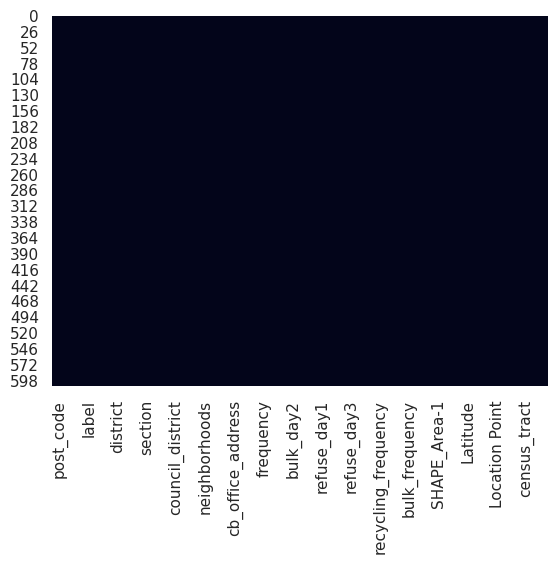

In [98]:
# check missing values in different columns via heatmap
sns.heatmap(dsny1.isnull(), cbar=False)

In [99]:
#dsny1.dropna()
#dropping columns
# dsny1 = dsny1.drop([ 'FID', 'FID-1', 'STATEPLANE_LABELX', 'STATEPLANE_LABELY', 'STATEPLANE_SNAPPEDX',
#        'STATEPLANE_SNAPPEDY', 'GlobalID'], axis=1)


In [100]:
dsny1.columns

Index(['post_code', 'modzcta', 'label', 'zcta', 'district', 'districtcode',
       'section', 'community_board', 'council_district', 'schedulecode',
       'neighborhoods', 'nta', 'cb_office_address', 'pop_est', 'frequency',
       'bulk_day1', 'bulk_day2', 'bulk_day3', 'refuse_day1', 'refuse_day2',
       'refuse_day3', 'refuse_frequency', 'recycling_frequency',
       'organic_frequency', 'bulk_frequency', 'ObjectID', 'SHAPE_Area-1',
       'SHAPE_Length-1', 'Latitude', 'Longitude', 'Location Point',
       'multipolygon-1', 'census_tract', 'GlobalID'],
      dtype='object')

In [101]:
dsny1.head()

,post_code,modzcta,label,zcta,district,districtcode,section,community_board,council_district,schedulecode,...,bulk_frequency,ObjectID,SHAPE_Area-1,SHAPE_Length-1,Latitude,Longitude,Location Point,multipolygon-1,census_tract,GlobalID
0,11385,11385,11385,11385,QW05,405,QW051,Community Board 5,30,4051E,...,Wed,412,0.002083,0.223740,40.700875,-73.893734,POINT (-73.893734 40.700875),MULTIPOLYGON (((-73.88770340399998 40.73429958...,577,{498F4BE7-A870-4D7D-AAA4-22F88AC15FE6}
1,11232,11232,11232,11232,BKS07,307,BKS073,Community Board 7,38,3073D,...,"Tue, Fri",227,0.001030,0.287433,40.650316,-74.008166,POINT (-74.008166 40.650316),MULTIPOLYGON (((-73.98017304799998 40.66116290...,82,{AB947263-8808-4F66-942F-985F5BF265E9}
2,11209,11209,11209,"11209, 11425",BKS10,310,BKS102,Community Board 10,43,3102E,...,Wed,249,0.001101,0.140901,40.624842,-74.024525,POINT (-74.024525 40.624842),MULTIPOLYGON (((-74.03231229499994 40.64404745...,138,{6CBE9191-CF75-4470-A89E-DEAE0936AB58}
3,11357,11357,11357,"11351, 11357",QE07,407,QE072,Community Board 7,19,4072C,...,Thu,434,0.003254,0.442474,40.770483,-73.835639,POINT (-73.835639 40.770483),MULTIPOLYGON (((-73.83972970299999 40.76515397...,907,{600D03CD-21FC-40BB-8ED4-0AAC26E90B98}
4,11219,11219,11219,11219,BKS12,312,BKS122,Community Board 12,44,3122D,...,"Tue, Fri",278,0.000984,0.165920,40.629302,-73.998083,POINT (-73.998083 40.629302),MULTIPOLYGON (((-73.97139775099998 40.64826603...,192,{7D89729A-7373-401E-853A-5044EBEA8556}


In [102]:
dsny1['Location Point'] = dsny1['Location Point'].str.replace('POINT', '')

In [103]:
dsny.bulk_day1.unique()

array(['Wed', 'Tue', 'Thu', 'Unspecified', 'Mon', 'Fri', 'Sat'],
      dtype=object)

#EDA RATS

In [104]:
print('Info:', rats.info())
print('top 5 rows:', rats.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210120 entries, 0 to 210119
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   unique_key                  210120 non-null  int64  
 1   created_date                210120 non-null  object 
 2   due_date                    121125 non-null  object 
 3   closed_date                 194098 non-null  object 
 4   location_type               210108 non-null  object 
 5   borough                     210118 non-null  object 
 6   incident_zip                210120 non-null  int64  
 7   community_board             210118 non-null  object 
 8   city                        207123 non-null  object 
 9   incident_address            210120 non-null  object 
 10  street_name                 210119 non-null  object 
 11  cross_street _1             191530 non-null  object 
 12  cross_street_2              191533 non-null  object 
 13  intersection_s

In [105]:
print('Rows, Columns:', rats.shape)
#80481, 25 without Unique Key as Index Rows, Columns: (208789, 28 ratsightings...no change in names or dropped collumns

Rows, Columns: (210120, 29)


Replacing the double checks(null)s

In [106]:
rats.index.is_unique

True

In [107]:
rats.isnull().sum()

unique_key                         0
created_date                       0
due_date                       88995
closed_date                    16022
location_type                     12
borough                            2
incident_zip                       0
community_board                    2
city                            2997
incident_address                   0
street_name                        1
cross_street _1                18590
cross_street_2                 18587
intersection_street_1         117884
intersection_street_2         117848
address_Type                    4444
landmark                      126987
status                             0
X Coordinate (State Plane)      1537
Y Coordinate (State Plane)      1537
latitude                        1537
longitude                       1537
location                        1537
table_count                        0
modztca                         1079
label                           1079
zcta                            1079
p

In [108]:
rats.head()

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
0,45747140,3/3/2020 6:15:50 AM,NaN,3/3/2020 6:15:50 AM,Commercial Building,BROOKLYN,11207,16 BROOKLYN,BROOKLYN,1746 BROADWAY,...,188102.0,40.682939,-73.910522,"(40.68293851538748, -73.91052156400578)",sightings,11207.0,11207,11207,91972.0,MULTIPOLYGON (((-73.90347629824663 40.67550542...
1,56989476,3/8/2023 2:27:46 AM,NaN,3/8/2023 2:27:46 AM,Construction Site,BROOKLYN,11215,06 BROOKLYN,BROOKLYN,205 14 STREET,...,182243.0,40.666891,-73.990293,"(40.666891259708756, -73.99029264560139)",sightings,11215.0,11215,11215,70156.0,MULTIPOLYGON (((-73.99822639169714 40.67120366...
2,46533529,6/18/2020 8:17:38 PM,NaN,NaN,1-2 Family Dwelling,BROOKLYN,11249,01 BROOKLYN,BROOKLYN,20 SOUTH 4 STREET,...,199125.0,40.713224,-73.967175,"(40.71322419170144, -73.96717477471884)",sightings,NaN,NaN,NaN,NaN,NaN
3,50422420,4/29/2021 5:18:50 PM,NaN,5/3/2021 6:30:22 AM,Other (Explain Below),MANHATTAN,10003,03 MANHATTAN,NEW YORK CITY,336 EAST 6 STREET,...,204137.0,40.726985,-73.987578,"(40.72698493398125, -73.98757795763353)",sightings,10003.0,10003,10003,54682.0,MULTIPOLYGON (((-73.98863576728334 40.72293099...
4,38983405,4/19/2018 12:00:00 AM,05/19/2018 04:59:18 PM,4/19/2018 12:00:00 AM,3+ Family Apt. Building,BROOKLYN,11216,03 BROOKLYN,BROOKLYN,462 NOSTRAND AVENUE,...,188153.0,40.683102,-73.950132,"(40.683102482748794, -73.95013179905419)",sightings,11216.0,11216,11216,56308.0,MULTIPOLYGON (((-73.94773018706293 40.66971511...


In [109]:
#check min max report dates
min_date = min(rats['created_date'])
max_date = max(rats['created_date'])
print('Date range: ', min_date, ' - ', max_date)

Date range:  1/1/2010 11:20:45 AM  -  9/9/2022 9:59:51 AM


In [111]:
#check min max report dates
min_date = min(rats['closed_date'])
max_date = max(rats['closed_date'])
print('Date range: ', min_date, ' - ', max_date)

TypeError: ignored

cant get index to stay... or is it me? reindex keeping this column that is sorted?

In [ ]:
rats.info()

the dates still shows as objects.

In [ ]:
rats.isnull().sum()

In [ ]:
#checking the index again no sort going up to reindex nesscisary?
rats.head()

In [ ]:
rats['incident_zip'].nlargest(n=15)

##Cleaning Rats

In [ ]:
rats.sort_values(by=['incident_zip']).head(5)

In [ ]:
rats_sorted = rats.sort_values(by=['created_date'], ascending=True)

In [ ]:
rats_sorted.reset_index(drop=True)

In [ ]:
print('Borough Value counts after dropping columns and nulls:/n',rats_sorted['borough'].value_counts())

In [ ]:
# Percentage by lambda and DataFrame.apply() method.
#  rat13 =   rat1.groupby(level=1).apply(lambda x:100 * x / float(x.sum()))

In [ ]:
rats_sorted.loc[~rats_sorted.index.duplicated(), :].head()

### Dropping duplicates/ columns/ nulls

In [ ]:
rat1 = rats_sorted.drop_duplicates()
rat1.shape == rats_sorted.shape

In [ ]:
rat1 = pd.DataFrame(rat1.sort_values(['created_date','unique_key'], ascending=True))

In [ ]:
#dropping columns that are unneeded or too many null values
# rat1 = rat1.drop(['cities_acceptable_irs', 'irs_estimated_population', 'landmark', 'marg_error'], axis=1)
# check missing values in different columns via heatmap
sns.heatmap(rat1.isnull(), cbar=False)

In [ ]:
rat1.columns

####Dropping final nulls for analysis

In [ ]:
rat1.isnull().sum()

In [ ]:
missing_counts =   rat1.isnull().sum().sort_values(ascending = False)
percent = (  rat1.isnull().sum()*100/  rat1.shape[0]).sort_values(ascending = False)

In [ ]:
missing_rat1 = pd.concat([missing_counts, percent], axis = 1, keys = ['Counts', '%'])
print(f' Missing values: \n{missing_rat1}')

Will go back and adapt as needed... for each analysis / population counts will need to be addressed also.

In [ ]:
# drop duplicate data (== gives the boolean value)
rat2 = rat1.drop_duplicates()
rat2.shape == rat1.shape

###pd.datetime/ created YQMWD

In [113]:
#Converting the date column to its specified data type
rat1['created_date'] = pd.to_datetime(rat1['created_date'])
rat1['closed_date'] = pd.to_datetime(rat1['closed_date'], errors='coerce')

In [155]:
# Creating 4 new columns for easy querying
rat1['year']= rat1.created_date.dt.year
rat1['quarter']= rat1.created_date.dt.quarter
rat1['month'] = rat1.created_date.dt.month
rat1['weekday'] = rat1.created_date.dt.weekday
rat1['day'] = rat1.created_date.dt.day
rat1['hour'] = rat1.created_date.dt.hour
rat1.head()

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,year,quarter,month,weekday,day,hour,incident_zips,address_zip,CB_address_zip,duration
204684,15633803,2010-01-01 08:29:58,01/31/2010 08:29:58 AM,NaT,3+ Family Apt. Building,BROOKLYN,11206,03 BROOKLYN,BROOKLYN,202 PULASKI STREET,...,2010,1,1,4,1,8,11206,"202 PULASKI STREET, 11206","03 BROOKLYN, 202 PULASKI STREET, 11206",0 days
173104,15633054,2010-01-01 11:20:45,01/31/2010 11:20:45 AM,NaT,1-2 Family Dwelling,QUEENS,11365,07 QUEENS,FRESH MEADOWS,59-13 159 STREET,...,2010,1,1,4,1,11,11365,"59-13 159 STREET, 11365","07 QUEENS, 59-13 159 STREET, 11365",0 days
172919,15633896,2010-01-01 12:11:51,01/31/2010 12:11:51 PM,NaT,3+ Family Apt. Building,MANHATTAN,10027,10 MANHATTAN,NEW YORK CITY,317 WEST 120 STREET,...,2010,1,1,4,1,12,10027,"317 WEST 120 STREET, 10027","10 MANHATTAN, 317 WEST 120 STREET, 10027",0 days
61527,15633897,2010-01-01 12:12:04,01/31/2010 12:12:04 PM,NaT,3+ Family Apt. Building,BRONX,10458,06 BRONX,BRONX,2356 LORILLARD PLACE,...,2010,1,1,4,1,12,10458,"2356 LORILLARD PLACE, 10458","06 BRONX, 2356 LORILLARD PLACE, 10458",0 days
175959,15633828,2010-01-01 14:15:27,01/31/2010 02:15:27 PM,NaT,Vacant Building,BROOKLYN,11218,12 BROOKLYN,BROOKLYN,900 CONEY ISLAND AVENUE,...,2010,1,1,4,1,14,11218,"900 CONEY ISLAND AVENUE, 11218","12 BROOKLYN, 900 CONEY ISLAND AVENUE, 11218",0 days


### replacing values in street_name

In [115]:
# Check if values in 'street_name' column are unique
is_unique = rat1['street_name'].is_unique
print("Are the values in 'street_name' column unique? ", is_unique)

# Get value counts of each unique value in 'street_name' column
value_counts = rat1['street_name'].value_counts()
print("Value counts of 'street_name' column:")
print(value_counts)

Are the values in 'street_name' column unique?  False
Value counts of 'street_name' column:
BROADWAY                        1779
EASTERN PARKWAY                 1209
GRAND CONCOURSE                 1158
BEDFORD AVENUE                   927
LAFAYETTE AVENUE                 878
                                ... 
EAST 69TH STREET                   1
STREET PAUL&apos;SOUTH PLACE       1
MILTON PLACE                       1
CHRISTOPHER LANE                   1
PARK AVENUE MALLS                  1
Name: street_name, Length: 7322, dtype: int64


In [116]:
#when visualizing i noticed west had a double space and n, s, w, e was used along with north, south, east and west
street_counts = rat1[rat1['street_name'].fillna('').str.contains('west', case=False)]['street_name'].value_counts()
print(street_counts)

WEST  116 STREET           569
WEST  107 STREET           507
WEST END AVENUE            433
WEST  122 STREET           417
WEST  108 STREET           352
                          ... 
WEST 239TH STREET            1
WEST 81ST STREET             1
WEST 75TH STREET             1
CROSS BRONX EXPY WEST        1
WEST   87 STREET GARDEN      1
Name: street_name, Length: 745, dtype: int64


In [117]:
#dictionary
replacements = {
    r'\bST\b': 'STREET',
    r'\bAVE\b': 'AVENUE',
    r'\b(BLVD|BLV)\b': 'BOULEVARD',
    r'\bPL\b': 'PLACE',
    r'\bCT\b': 'COURT',
    r'\bDR\b': 'DRIVE',
    r'\bSQ\b': 'SQUARE',
    r'\bTCE\b': 'TERRACE',
    r'\bAVE\b': 'AVENUE',
    r'\bE\b': 'EAST',
    r'\bW\b': 'WEST',
    r'\bN\b': 'NORTH',
    r'\bS\b': 'SOUTH',
    'DR MARTIN L KING JR BOULEVARD': 'DR MARTIN LUTHER KING JR BOULEVARD',
    'DR M L KING JR BOULEVARD': 'DR MARTIN LUTHER KING JR BOULEVARD',
    'DR MARTIN L KING JR BLVD': 'DR MARTIN LUTHER KING JR BOULEVARD',
    'DR MARTIN LUTHER KING JR BLVD': 'DR MARTIN LUTHER KING JR BOULEVARD'
}

# Apply the replacement rules
rat1['street_name'] = rat1['street_name'].replace(replacements, regex=True)

In [118]:
rat1['street_name'].unique()

array(['PULASKI STREET', '159 STREET', 'WEST 120 STREET', ...,
       'POLITE AVENUE', 'NORTH   15 STREET', 'PARK AVENUE MALLS'],
      dtype=object)

In [119]:
#dictionary
incident_address_replacements = {
    r'\bST\b': 'STREET',
    r'\bAVE\b': 'AVENUE',
    r'\b(BLVD|BLV)\b': 'BOULEVARD',
    r'\bPL\b': 'PLACE',
    r'\bCT\b': 'COURT',
    r'\bDR\b': 'DRIVE',
    r'\bSQ\b': 'SQUARE',
    r'\bTCE\b': 'TERRACE',
    r'\bAVE\b': 'AVENUE',
    r'\bE\b': 'EAST',
    r'\bW\b': 'WEST',
    r'\bN\b': 'NORTH',
    r'\bS\b': 'SOUTH',
    r'\bDR MARTIN L KING JR BOULEVARD\b': 'DR MARTIN LUTHER KING JR BOULEVARD',
    r'\bDR M L KING JR BOULEVARD\b': 'DR MARTIN LUTHER KING JR BOULEVARD',
    r'\bDR MARTIN L KING JR BLVD\b': 'DR MARTIN LUTHER KING JR BOULEVARD',
    r'\bDR MARTIN LUTHER KING JR BLVD\b': 'DR MARTIN LUTHER KING JR BOULEVARD'
}

# Apply the replacement rules
rat1['incident_address'] = rat1['incident_address'].replace(incident_address_replacements, regex=True)

In [120]:
# double check if values are unique
is_unique = rat1['incident_address'].is_unique
print("Are the values in 'incident_address' column unique? ", is_unique)

# Get value counts of each unique value
value_counts = rat1['incident_address'].value_counts()
print("Value counts of 'incident_address' column:")
print(value_counts)

Are the values in 'incident_address' column unique?  False
Value counts of 'incident_address' column:
2131 WALLACE AVENUE         317
95 EASTERN PARKWAY          256
651 BROOKLYN AVENUE         177
410 EASTERN PARKWAY         150
2486 DAVIDSON AVENUE        138
                           ... 
424-428 WEST 35TH STREET      1
1301 57TH STREET              1
688 EAST 46 STREET            1
1032 EAST 95 STREET           1
PARK ROW                      1
Name: incident_address, Length: 96866, dtype: int64


In [121]:
#Remove extra spaces
rat1['incident_address'] = rat1['incident_address'].apply(lambda x: "".join([x[i] for i in range(len(x)) if i == 0 or (x[i] != " " or x[i-1] != " ")]))

In [122]:
address_counts = rat1['incident_address'].fillna('').value_counts()
print(address_counts)

2131 WALLACE AVENUE         317
95 EASTERN PARKWAY          256
651 BROOKLYN AVENUE         177
410 EASTERN PARKWAY         150
2486 DAVIDSON AVENUE        138
                           ... 
424-428 WEST 35TH STREET      1
1301 57TH STREET              1
688 EAST 46 STREET            1
1032 EAST 95 STREET           1
PARK ROW                      1
Name: incident_address, Length: 96866, dtype: int64


#VALUES

In [123]:
#check min max crash dates
min_date = min(rat1['created_date'])
max_date = max(rat1['created_date'])
print(f'Date range:  {min_date}  -  {max_date}')

Date range:  2010-01-01 08:29:58  -  2023-07-03 02:05:32


In [125]:
#check min max crash dates
min_date = min(rat1['closed_date'])
max_date = max(rat1['closed_date'])
print(f'Date range:  {min_date}  -  {max_date}')

Date range:  NaT  -  NaT


##concat zip and address... then modify this code

In [126]:
# Convert "incident_zip" to string type
rat1['incident_zips'] = rat1['incident_zip'].astype(str)

# Create a new column combining "incident_address" and "incident_zip"
rat1['address_zip'] = rat1['incident_address'] + ', ' + rat1['incident_zips']


In [127]:
# Top addresses ZIP codes by created date
top_addresses_by_created_date = rat1.groupby(['created_date'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

# Top addresses ZIP codes by year
top_addresses_by_year = rat1.groupby(['year'])['address_zip'].apply(lambda x: x.value_counts().nlargest())
# Top addresses ZIP codes by quarter
top_addresses_by_quarter = rat1.groupby(['quarter'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

# Top addresses ZIP codes by month
top_addresses_by_month = rat1.groupby(['month'])['address_zip'].apply(lambda x: x.value_counts().nlargest())
# Top addresses ZIP codes by weekday
top_addresses_by_weekday = rat1.groupby(['weekday'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

# Top addresses ZIP codes by day of the week
top_addresses_by_day_of_week = rat1.groupby(['day'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

# Top addresses ZIP codes by hour
top_addresses_by_hour = rat1.groupby(['hour'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

# Display the results
print("Top addresses ZIP code by created date:")
print(top_addresses_by_created_date)
print()

print("Top addresses ZIP code by year:")
print(top_addresses_by_year)
print()

print("Top addresses ZIP code by quarter:")
print(top_addresses_by_quarter)
print()

print("Top addresses ZIP code by month:")
print(top_addresses_by_month)
print()

print("Top addresses ZIP code by weekday:")
print(top_addresses_by_weekday)
print()

print("Top addresses ZIP code by day of the week:")
print(top_addresses_by_day_of_week)
print()

print("Top addresses ZIP code by hour:")
print(top_addresses_by_hour)
print()

Top addresses ZIP code by created date:
created_date                                       
2010-01-01 08:29:58  202 PULASKI STREET, 11206         1
2010-01-01 11:20:45  59-13 159 STREET, 11365           1
2010-01-01 12:11:51  317 WEST 120 STREET, 10027        1
2010-01-01 12:12:04  2356 LORILLARD PLACE, 10458       1
2010-01-01 14:15:27  900 CONEY ISLAND AVENUE, 11218    1
                                                      ..
2023-07-02 23:04:44  134 MONTAGUE STREET, 11201        1
2023-07-02 23:27:12  34-20 32 STREET, 11106            1
2023-07-03 00:19:54  3 WEST 137 STREET, 10037          1
2023-07-03 01:08:50  PARK ROW, 10038                   1
2023-07-03 02:05:32  EAST 73 STREET, 10021             1
Name: address_zip, Length: 116542, dtype: int64

Top addresses ZIP code by year:
year                                  
2010  600 WEST 196 STREET, 10040          28
      EAST 93 STREET, 10128               23
      2980 WEST 28 STREET, 11224          18
      2970 WEST 27 STREET,

In [128]:
# Top community board
top_community_board = rat1.groupby(['created_date', 'community_board'])['unique_key'].apply(lambda x: x.value_counts().nlargest())
print("Top street name by Created Date :")
print(top_community_board)
print()

Top street name by Created Date :
created_date         community_board                
2010-01-01 08:29:58  03 BROOKLYN            15633803    1
2010-01-01 11:20:45  07 QUEENS              15633054    1
2010-01-01 12:11:51  10 MANHATTAN           15633896    1
2010-01-01 12:12:04  06 BRONX               15633897    1
2010-01-01 14:15:27  12 BROOKLYN            15633828    1
                                                       ..
2023-07-02 23:04:44  02 BROOKLYN            58072108    1
2023-07-02 23:27:12  01 QUEENS              58077231    1
2023-07-03 00:19:54  10 MANHATTAN           58078235    1
2023-07-03 01:08:50  01 MANHATTAN           58075206    1
2023-07-03 02:05:32  Unspecified MANHATTAN  58072023    1
Name: unique_key, Length: 205636, dtype: int64



In [129]:
# Top Community Boards by year','quarter','month','weekday'
top_cb_yqmw = rat1.groupby(['year','quarter','month','weekday', 'community_board'])['unique_key'].apply(lambda x: x.value_counts().idxmax())

print("Top Community Boards by year','quarter','month','weekday':")
print(top_cb_yqmw)
print()

Top Community Boards by year','quarter','month','weekday':
year  quarter  month  weekday  community_board     
2010  1        1      0        01 BRONX                15647471
                               01 BROOKLYN             15704272
                               01 QUEENS               15796557
                               02 BRONX                15752672
                               02 MANHATTAN            15648874
                                                         ...   
2023  3        7      6        12 MANHATTAN            58070045
                               14 BROOKLYN             58074172
                               16 BROOKLYN             58064091
                               17 BROOKLYN             58078076
                               Unspecified BROOKLYN    58071006
Name: unique_key, Length: 54869, dtype: int64



In [130]:
# Top  Community Boards by year','quarter','month'
top_cb_yqm = rat1.groupby(['year','quarter','month', 'community_board'])['unique_key'].apply(lambda x: x.value_counts().idxmax())

print("Top  Community Boards by year...:")
print(top_cb_yqm)
print()

Top  Community Boards by year...:
year  quarter  month  community_board      
2010  1        1      01 BRONX                 15637843
                      01 BROOKLYN              15686005
                      01 MANHATTAN             15668832
                      01 QUEENS                15633594
                      01 STATEN ISLAND         15678289
                                                 ...   
2023  3        7      16 BROOKLYN              58063257
                      17 BROOKLYN              58053098
                      18 BROOKLYN              58066567
                      Unspecified BROOKLYN     58071006
                      Unspecified MANHATTAN    58065417
Name: unique_key, Length: 10218, dtype: int64



In [131]:
# Top  Community Boards by year','quarter'
top_cb_yq = rat1.groupby(['year','quarter', 'community_board'])['unique_key'].apply(lambda x: x.value_counts().idxmax())

print("Top  Community Boards by year and quarter.:")
print(top_cb_yq)
print()

Top  Community Boards by year and quarter.:
year  quarter  community_board      
2010  1        01 BRONX                 15637843
               01 BROOKLYN              15686005
               01 MANHATTAN             15668832
               01 QUEENS                15633594
               01 STATEN ISLAND         15678289
                                          ...   
2023  3        16 BROOKLYN              58063257
               17 BROOKLYN              58053098
               18 BROOKLYN              58066567
               Unspecified BROOKLYN     58071006
               Unspecified MANHATTAN    58065417
Name: unique_key, Length: 3519, dtype: int64



In [132]:
# Top incident address by year
top_cb_y = rat1.groupby(['year', 'community_board'])['unique_key'].apply(lambda x: x.value_counts().idxmax())

print("Top incident address by year and quarter.:")
print(top_cb_y)
print()

Top incident address by year and quarter.:
year  community_board      
2010  01 BRONX                 15637843
      01 BROOKLYN              15686005
      01 MANHATTAN             15668832
      01 QUEENS                15633594
      01 STATEN ISLAND         15678289
                                 ...   
2023  81 QUEENS                57763929
      Unspecified BRONX        56508551
      Unspecified BROOKLYN     56879053
      Unspecified MANHATTAN    56694195
      Unspecified QUEENS       56438436
Name: unique_key, Length: 922, dtype: int64



In [133]:
# Create a new column combining 'Community board'"incident_address" and "incident_zip"
rat1['CB_address_zip'] = rat1['community_board'] + ', ' + rat1['incident_address'] + ', ' + rat1['incident_zips']

In [134]:
# Top incident address by 'year','quarter','month', day, 'weekday'
top_addresses = rat1.groupby(['year','created_date','CB_address_zip'])['unique_key'].apply(lambda x: x.value_counts().idxmax())

print("Top incident address by 'year','quarter','month', day, 'weekday'")
print(top_addresses)
print()

Top incident address by 'year','quarter','month', day, 'weekday'
year  created_date         CB_address_zip                              
2010  2010-01-01 08:29:58  03 BROOKLYN, 202 PULASKI STREET, 11206          15633803
      2010-01-01 11:20:45  07 QUEENS, 59-13 159 STREET, 11365              15633054
      2010-01-01 12:11:51  10 MANHATTAN, 317 WEST 120 STREET, 10027        15633896
      2010-01-01 12:12:04  06 BRONX, 2356 LORILLARD PLACE, 10458           15633897
      2010-01-01 14:15:27  12 BROOKLYN, 900 CONEY ISLAND AVENUE, 11218     15633828
                                                                             ...   
2023  2023-07-02 23:04:44  02 BROOKLYN, 134 MONTAGUE STREET, 11201         58072108
      2023-07-02 23:27:12  01 QUEENS, 34-20 32 STREET, 11106               58077231
      2023-07-03 00:19:54  10 MANHATTAN, 3 WEST 137 STREET, 10037          58078235
      2023-07-03 01:08:50  01 MANHATTAN, PARK ROW, 10038                   58075206
      2023-07-03 02:05:

In [135]:
# Top incident address by year','quarter','month','weekday'
top_addresses_yqmw = rat1.groupby(['year','quarter','month','weekday', 'CB_address_zip'])['unique_key'].apply(lambda x: x.value_counts().idxmax())

print("Top incident address by year','quarter','month','weekday':")
print(top_addresses_yqmw)
print()

Top incident address by year','quarter','month','weekday':
year  quarter  month  weekday  CB_address_zip                         
2010  1        1      0        01 BRONX, 574 EAST 156 STREET, 10455       15797681
                               01 BRONX, 751 TRINITY AVENUE, 10456        15647471
                               01 BROOKLYN, 417 FLUSHING AVENUE, 11205    15704272
                               01 QUEENS, 38-04 BROADWAY, 11103           15796557
                               02 BRONX, 956 ROGERS PLACE, 10459          15752672
                                                                            ...   
2023  3        7      6        14 BROOKLYN, 217 EAST 19 STREET, 11226     58074172
                               14 BROOKLYN, 380 RUGBY ROAD, 11226         58073157
                               16 BROOKLYN, 518 CHAUNCEY STREET, 11233    58064091
                               17 BROOKLYN, 9506 AVENUE A, 11236          58078076
                               Unspecifi

In [136]:
# Top incident address by year','quarter','month'
top_addresses_yqm = rat1.groupby(['year','quarter','month','CB_address_zip'])['unique_key'].apply(lambda x: x.value_counts().idxmax())

print("Top incident address by year...:")
print(top_addresses_yqm)
print()

Top incident address by year...:
year  quarter  month  CB_address_zip                              
2010  1        1      01 BRONX, 409 EAST 154 STREET, 10455            15793704
                      01 BRONX, 539 EAST 147 STREET, 10455            15807087
                      01 BRONX, 574 EAST 156 STREET, 10455            15797681
                      01 BRONX, 610 TRINITY AVENUE, 10455             15732257
                      01 BRONX, 732 UNION AVENUE, 10455               15637843
                                                                        ...   
2023  3        7      17 BROOKLYN, 9506 AVENUE A, 11236               58078076
                      18 BROOKLYN, 5803 AVENUE T, 11234               58066567
                      Unspecified BROOKLYN, BROADWAY, 11211           58071006
                      Unspecified MANHATTAN, EAST 73 STREET, 10021    58072023
                      Unspecified MANHATTAN, EAST 87 STREET, 10128    58065417
Name: unique_key, Length: 18066

In [137]:
# Top incident address by year','quarter'
top_addresses_yq = rat1.groupby(['year','quarter', 'CB_address_zip'])['unique_key'].apply(lambda x: x.value_counts().idxmax())

print("Top incident address by year and quarter.:")
print(top_addresses_yq)
print()

Top incident address by year and quarter.:
year  quarter  CB_address_zip                              
2010  1        01 BRONX, 2870 3 AVENUE, 10455                  16218966
               01 BRONX, 301 MORRIS AVENUE, 10451              16298023
               01 BRONX, 325 CYPRESS AVENUE, 10454             16155713
               01 BRONX, 390 EAST 153 STREET, 10455            16091091
               01 BRONX, 409 EAST 154 STREET, 10455            15793704
                                                                 ...   
2023  3        17 BROOKLYN, 9506 AVENUE A, 11236               58078076
               18 BROOKLYN, 5803 AVENUE T, 11234               58066567
               Unspecified BROOKLYN, BROADWAY, 11211           58071006
               Unspecified MANHATTAN, EAST 73 STREET, 10021    58072023
               Unspecified MANHATTAN, EAST 87 STREET, 10128    58065417
Name: unique_key, Length: 166971, dtype: int64



In [138]:
# Top incident address by year
top_addresses_y = rat1.groupby(['year', 'CB_address_zip'])['unique_key'].apply(lambda x: x.value_counts().idxmax())

print("Top incident address by year and quarter.:")
print(top_addresses_y)
print()

Top incident address by year and quarter.:
year  CB_address_zip                                
2010  01 BRONX, 147 BRUCKNER BOULEVARD, 10454           18492802
      01 BRONX, 225 STREET ANNS AVENUE, 10454           16664134
      01 BRONX, 231 BROOK AVENUE, 10454                 17605458
      01 BRONX, 272 MORRIS AVENUE, 10451                18592170
      01 BRONX, 281 STREET ANN'SOUTH AVENUE, 10454      19226483
                                                          ...   
2023  Unspecified QUEENS, 41 STREET, 11103              56438436
      Unspecified QUEENS, 47 AVENUE, 11101              57569401
      Unspecified QUEENS, 57 ROAD, 11378                57708223
      Unspecified QUEENS, 65 PLACE, 11385               57001209
      Unspecified QUEENS, METROPOLITAN AVENUE, 11379    57767921
Name: unique_key, Length: 147796, dtype: int64



In [139]:
top_addresses_y = top_addresses_y.reset_index()

In [140]:
top_addresses_yq_df = top_addresses_yq.reset_index()

In [141]:
top_10_unique_addresses = rat1['incident_address'].value_counts().nlargest(10).index.tolist()

In [142]:
top_10_unique_addresses

['2131 WALLACE AVENUE',
 '95 EASTERN PARKWAY',
 '651 BROOKLYN AVENUE',
 '410 EASTERN PARKWAY',
 '2486 DAVIDSON AVENUE',
 '1912 AVENUE H',
 'BROADWAY',
 '41-49 150 STREET',
 '557 MONTGOMERY STREET',
 '60 WEST 142 STREET']

##DATEDIF

In [156]:
#Converting the date column to its specified data type
rat1['created_date'] = pd.to_datetime(rat1['created_date'], errors='coerce').dt.date
rat1['closed_date'] = pd.to_datetime(rat1['closed_date'], errors='coerce').dt.date

In [161]:
# Calculate the duration between 'created_date' and 'closed_date' and assign it to 'duration' column
rat1['duration'] = rat1['closed_date'] - rat1['created_date']

# Replace NaT values in 'duration' column with zeros
rat1['duration'] = rat1['duration'].fillna(pd.Timedelta(0))

# Convert duration from nanoseconds to days
rat1['duration'] = (rat1['duration'] / pd.Timedelta(days=1)).astype(int)

# Display the updated DataFrame
print(rat1)

        unique_key created_date                due_date closed_date  \
204684    15633803   2010-01-01  01/31/2010 08:29:58 AM         NaN   
173104    15633054   2010-01-01  01/31/2010 11:20:45 AM         NaN   
172919    15633896   2010-01-01  01/31/2010 12:11:51 PM         NaN   
61527     15633897   2010-01-01  01/31/2010 12:12:04 PM         NaN   
175959    15633828   2010-01-01  01/31/2010 02:15:27 PM         NaN   
...            ...          ...                     ...         ...   
41958     58072108   2023-07-02                     NaN         NaN   
62070     58077231   2023-07-02                     NaN         NaN   
162028    58078235   2023-07-03                     NaN         NaN   
150125    58075206   2023-07-03                     NaN         NaN   
62487     58072023   2023-07-03                     NaN         NaN   

                  location_type    borough  incident_zip  \
204684  3+ Family Apt. Building   BROOKLYN         11206   
173104      1-2 Family Dwel

In [162]:
rat1['duration'].unique()

array([     0,     64,     11,     42,      7,     20,     29,     14,
           13,     21,     47,      5,     15,     40,      1,     77,
            8,      6,     33,     36,     74,     10,     18,     12,
           19,     48,     25,     63,     45,      4,      9,     17,
            3,      2,     31,     24,     16,     34,     27,     92,
           30,     41,     22,     38,     23,     50,    132,     58,
          191,    166,     65,     84,     35,     69,    179,     89,
           28,     82,     39,    150,     81,     46,     66,     26,
          160,    181,    130,    178,     32,     43,    105,    233,
          100,     83,     79,     99,    176,    173,    253,    244,
          303,     51,    208,     49,     86,    131,    188,     76,
           70,    124,     59,     54,     56,     55,    113,     52,
          141,     37,     62,    140,     75,     53,     88,     93,
           44,     67,    195,    162,    119,    279,    106,    146,
      

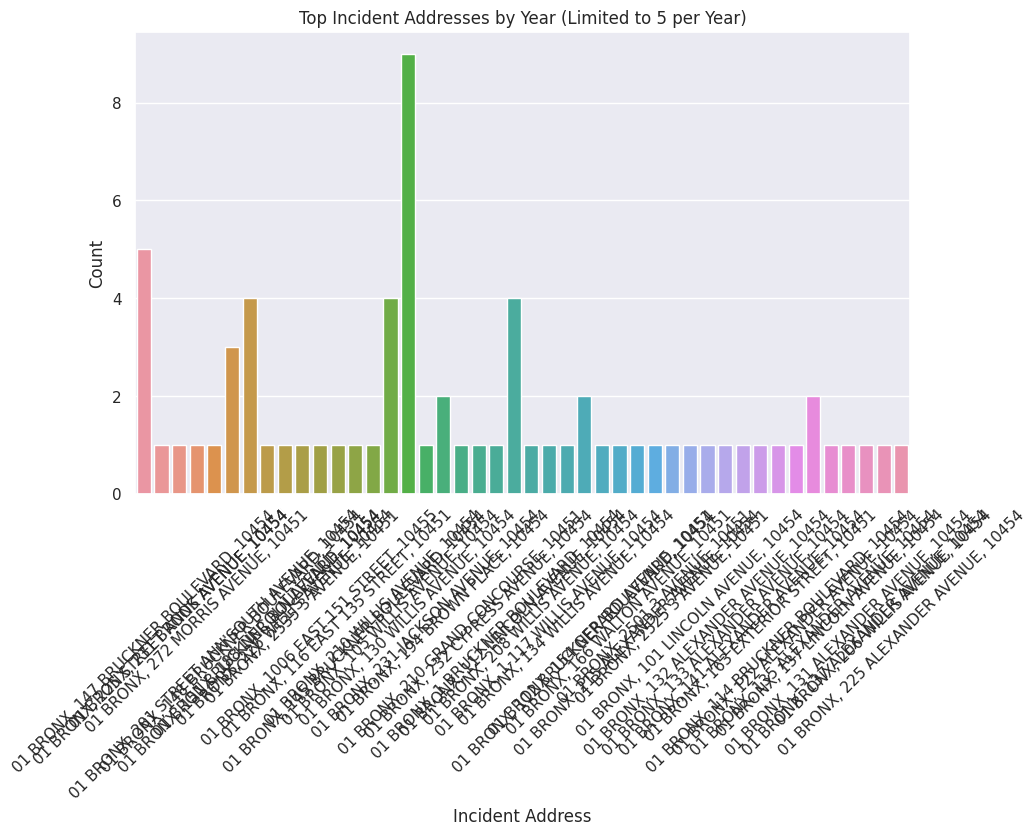

In [147]:
# Top incident address by year
# Limit top CB_address_zip values to 5 per year
top_addresses_y_filtered = top_addresses_y.groupby('year').head(5)

# Plot the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=top_addresses_y_filtered, x='CB_address_zip')
plt.xlabel('Incident Address')
plt.ylabel('Count')
plt.title('Top Incident Addresses by Year (Limited to 5 per Year)')
plt.xticks(rotation=45)
plt.show()


NameError: ignored

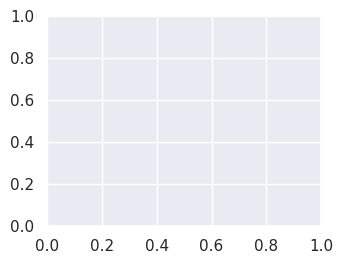

In [148]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the top incident ZIP codes by created date
plt.subplot(2, 3, 1)
top_zip_by_created_date.plot(kind='line')
plt.xlabel('Created Date')
plt.ylabel('Incident ZIP Code')
plt.title('Top Incident ZIP Codes by Created Date')
plt.xticks(rotation=45)
# Plot the top incident ZIP codes by year
plt.subplot(2, 3, 2)
top_zip_by_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Incident ZIP Code')
plt.title('Top Incident ZIP Codes by Year')
plt.xticks(rotation=45)
# Plot the top incident ZIP codes by quarter
plt.subplot(2, 3, 3)
top_zip_by_quarter.plot(kind='bar')
plt.xlabel('Quarter')
plt.ylabel('Incident ZIP Code')
plt.title('Top Incident ZIP Codes by Quarter')
plt.xticks(rotation=45)
# Plot the top incident ZIP codes by month
plt.subplot(2, 3, 4)
top_zip_by_month.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Incident ZIP Code')
plt.title('Top Incident ZIP Codes by Month')
plt.xticks(rotation=45)
# Plot the top incident ZIP codes by weekday
plt.subplot(2, 3, 5)
top_zip_by_weekday.plot(kind='line')
plt.xlabel('Weekday')
plt.ylabel('Incident ZIP Code')
plt.title('Top Incident ZIP Codes by Weekday')
plt.xticks(rotation=45)
# Plot the top incident ZIP codes by hour
plt.subplot(2, 3, 6)
top_zip_by_hour.plot(kind='line')
plt.xlabel('Hour')
plt.ylabel('Incident ZIP Code')
plt.title('Top Incident ZIP Codes by Hour')
plt.xticks(rotation=45)


# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

In [149]:
# Reset the index to convert the series to a DataFrame
top_addresses_df = top_addresses.reset_index()
# Filter the data for the years 2020 to 2023
filtered_top_addresses_df = top_addresses_df[top_addresses_df['year'].between(2020, 2023)]

# Plot the count of incident ZIP codes by year, month, and community board
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_top_addresses_df, x='year', hue='community_board', palette='viridis')

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Top Addresses Reporting RATS!!!! by Year and Month (2020-2023)')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=6, ncol=2, title='Community Board')

# Display the plot
plt.show()

ValueError: ignored

<Figure size 1200x600 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=rat1, x='longitude', y='latitude', hue='community_board', alpha=0.15, palette="viridis", label='Rat Sightings\n Community Districts', ax=ax)
sns.scatterplot(data=dsny1, x='Longitude', y='Latitude', hue= 'district', palette="Blues" ,label='\nDSNY Districts', ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=6, ncol=2)
ax.set_title('Rat Sightings by Community Districts/DSNY Districts 2010-6/2023')
plt.show()

#**series count weekday**
Monday = 0

Tuesday = 1

Wednesday = 2, and so on

#NEW df with no no nulls/ for value counts to scale and analyse/

In [ ]:
# Create a new DataFrame for rat1 analysis
rat1_analysis = rat1.copy()

In [ ]:
rat1_analysis.columns

In [ ]:
sns.heatmap(rat1_analysis.isnull(), cbar=False)

In [ ]:
# Drop the specified columns
columns_to_drop = ['due_date', 'intersection_street_1', 'intersection_street_2', 'address_Type', 'landmark', 'status', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'latitude', 'longitude', 'location', 'label', 'zcta', 'pop_est', 'the_geom']
rat1_analysis = rat1_analysis.drop(columns_to_drop, axis=1)

In [ ]:
# Drop rows with null values in 'created_date' column
rat1_analysis = rat1_analysis.dropna(subset=['created_date'])

In [ ]:
sns.heatmap(rat1_analysis.isnull(), cbar=False)

In [ ]:
top_25_address_counts = rat1_analysis.groupby('CB_address_zip').agg('nunique').nlargest(25, 'unique_key', keep='first')

print(top_25_address_counts)

In [ ]:
top_address_counts = rat1_analysis.groupby('CB_address_zip').nunique().sort_values('unique_key', ascending=False)

print(top_address_counts.head())

In [ ]:
top_address_counts.community_board.unique()

In [ ]:
top_address_counts.info()

In [ ]:

# define data
data = top_address_scale
# define min max scaler
scaler2 = MinMaxScaler()
# transform data
scaled_top_address = scaler2.fit_transform(data)
print(scaled_top_address)

In [ ]:
top_address_scale = top_address_counts.copy()

# Select numeric columns for scaling
numeric_columns = top_address_scale.select_dtypes(include=['int', 'float']).columns

# Scale the numeric columns
scaler = StandardScaler()
top_address_scale[numeric_columns] = scaler.fit_transform(top_address_scale[numeric_columns])

print(top_address_scale)

In [ ]:
SI_rats = rat1_dist2[rat1_dist2['community_board'].str.contains('stat', case=False)]
print(f'Community Board districts: \n{SI_rats.head()}')

#RATS>>DSNY

##DSNY new dataframes / and bools

In [ ]:
dsny1_dist = dsny1.district.unique()
print(f'DSNY districts: {dsny1_dist}')

In [ ]:
BRX = dsny1.drop(dsny1[(dsny1['district'] == 'BKN01') | (dsny1['district'] == 'BKN02') | (dsny1['district'] ==  'BKN03') | (dsny1['district'] == 'BKN04') | (dsny1['district'] == 'BKN05') | (dsny1['district'] == 'BKS06') | (dsny1['district'] == 'BKS07') | (dsny1['district'] == 'BKN08')|(dsny1['district'] == 'BKN09') |
                      (dsny1['district'] == 'BKS10') | (dsny1['district'] == 'BKS11') | (dsny1['district'] ==  'BKS12') | (dsny1['district'] == 'BKS13') | (dsny1['district'] == 'BKS14') | (dsny1['district'] == 'BKS15') | (dsny1['district'] == 'BKN16') | (dsny1['district'] == 'BKN17')|(dsny1['district'] == 'BKS18') |
                      (dsny1['district'] == 'SI01') | (dsny1['district'] == 'SI02') | (dsny1['district'] == 'SI03') | (dsny1['district'] == 'MN01') | (dsny1['district'] == 'MN02') | (dsny1['district'] == 'MN03') |
                      (dsny1['district'] == 'MN04') | (dsny1['district'] == 'MN05') | (dsny1['district'] == 'MN06') | (dsny1['district'] == 'MN07') | (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') | (dsny1['district'] == 'MN06') | (dsny1['district'] == 'MN07') |
                      (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') | (dsny1['district'] == 'MN10') | (dsny1['district'] == 'MN11') | (dsny1['district'] == 'MN12') | (dsny1['district'] == 'QW04') | (dsny1['district'] == 'QW01') | (dsny1['district'] == 'QW02') |
                      (dsny1['district'] == 'QW03') | (dsny1['district'] == 'QW05') | (dsny1['district'] == 'QW06') | (dsny1['district'] == 'QE07') | (dsny1['district'] == 'QE08') | (dsny1['district'] == 'QW09') | (dsny1['district'] == 'QE10') | (dsny1['district'] == 'QE11') |
                      (dsny1['district'] == 'QE12') | (dsny1['district'] == 'QE13') | (dsny1['district'] == 'QE14') ].index)
BRX_dsny = pd.DataFrame(BRX)
print(BRX_dsny.district.unique())


In [ ]:
 BKN = dsny1.drop(dsny1[(dsny1['district'] == 'SI01') | (dsny1['district'] == 'SI02') | (dsny1['district'] == 'SI03') | (dsny1['district'] == 'MN01') | (dsny1['district'] == 'MN02') | (dsny1['district'] == 'MN03') | (dsny1['district'] == 'MN04') | (dsny1['district'] == 'MN05')|
                       (dsny1['district'] == 'MN06') | (dsny1['district'] == 'MN07') | (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') | (dsny1['district'] == 'MN06') | (dsny1['district'] == 'MN07') | (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') |
                       (dsny1['district'] == 'MN10') | (dsny1['district'] == 'MN11') | (dsny1['district'] == 'MN12') | (dsny1['district'] == 'QW04') | (dsny1['district'] == 'QW01') | (dsny1['district'] == 'QW02') | (dsny1['district'] == 'QW03') | (dsny1['district'] == 'QW05') |
                       (dsny1['district'] == 'QW06') | (dsny1['district'] == 'QE07') | (dsny1['district'] == 'QE08') | (dsny1['district'] == 'QW09') | (dsny1['district'] == 'QE10') | (dsny1['district'] == 'QE11') | (dsny1['district'] == 'QE12') | (dsny1['district'] == 'QE13') |
                       (dsny1['district'] == 'QE14') | (dsny1['district'] == 'BX01') | (dsny1['district'] == 'BX02') | (dsny1['district'] == 'BX03') | (dsny1['district'] == 'BX04') | (dsny1['district'] == 'BX05') | (dsny1['district'] == 'BX06') | (dsny1['district'] == 'BX07') |
                       (dsny1['district'] == 'BX08') | (dsny1['district'] == 'BX09') | (dsny1['district'] == 'BX10') | (dsny1['district'] == 'BX11') | (dsny1['district'] == 'BX12')].index)
BKN_dsny = pd.DataFrame(BKN)
print(BKN_dsny.district.unique())

In [ ]:
QNS = dsny1.drop(dsny1[(dsny1['district'] == 'BKN01') | (dsny1['district'] == 'BKN02') | (dsny1['district'] ==  'BKN03') | (dsny1['district'] == 'BKN04') | (dsny1['district'] == 'BKN05') | (dsny1['district'] == 'BKS06') | (dsny1['district'] == 'BKS07') | (dsny1['district'] == 'BKN08')|(dsny1['district'] == 'BKN09') |
                      (dsny1['district'] == 'BKS10') | (dsny1['district'] == 'BKS11') | (dsny1['district'] ==  'BKS12') | (dsny1['district'] == 'BKS13') | (dsny1['district'] == 'BKS14') | (dsny1['district'] == 'BKS15') | (dsny1['district'] == 'BKN16') | (dsny1['district'] == 'BKN17')|(dsny1['district'] == 'BKS18') |
                      (dsny1['district'] == 'SI01') | (dsny1['district'] == 'SI02') | (dsny1['district'] == 'SI03') | (dsny1['district'] == 'MN01') | (dsny1['district'] == 'MN02') | (dsny1['district'] == 'MN03') | (dsny1['district'] == 'MN04') | (dsny1['district'] == 'MN05') | (dsny1['district'] == 'MN06') |
                      (dsny1['district'] == 'MN07') | (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') | (dsny1['district'] == 'MN06') | (dsny1['district'] == 'MN07') | (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') | (dsny1['district'] == 'MN10') | (dsny1['district'] == 'MN11') |
                      (dsny1['district'] == 'MN12') | (dsny1['district'] == 'BX01') | (dsny1['district'] == 'BX02') | (dsny1['district'] == 'BX03') | (dsny1['district'] == 'BX04') | (dsny1['district'] == 'BX05') | (dsny1['district'] == 'BX06') | (dsny1['district'] == 'BX07') | (dsny1['district'] == 'BX08') |
                      (dsny1['district'] == 'BX09') | (dsny1['district'] == 'BX10') | (dsny1['district'] == 'BX11') | (dsny1['district'] == 'BX12')].index)
QNS_dsny = pd.DataFrame(QNS)
print(QNS_dsny.district.unique())

In [ ]:
SI = dsny1.drop(dsny1[(dsny1['district'] == 'BKN01') | (dsny1['district'] == 'BKN02') | (dsny1['district'] ==  'BKN03') | (dsny1['district'] == 'BKN04') | (dsny1['district'] == 'BKN05') | (dsny1['district'] == 'BKS06') | (dsny1['district'] == 'BKS07') | (dsny1['district'] == 'BKN08')|(dsny1['district'] == 'BKN09') |
                      (dsny1['district'] == 'BKS10') | (dsny1['district'] == 'BKS11') | (dsny1['district'] ==  'BKS12') | (dsny1['district'] == 'BKS13') | (dsny1['district'] == 'BKS14') | (dsny1['district'] == 'BKS15') | (dsny1['district'] == 'BKN16') | (dsny1['district'] == 'BKN17')|(dsny1['district'] == 'BKS18') | (dsny1['district'] == 'MN01') | (dsny1['district'] == 'MN02') | (dsny1['district'] == 'MN03') | (dsny1['district'] == 'MN04') | (dsny1['district'] == 'MN05') | (dsny1['district'] == 'BX01') |
                      (dsny1['district'] == 'BX02') | (dsny1['district'] == 'BX03') | (dsny1['district'] == 'BX04') | (dsny1['district'] == 'BX05') | (dsny1['district'] == 'BX06') | (dsny1['district'] == 'BX07') | (dsny1['district'] == 'BX08') | (dsny1['district'] == 'BX09') |
                      (dsny1['district'] == 'BX10') | (dsny1['district'] == 'BX11') | (dsny1['district'] == 'BX12') | (dsny1['district'] == 'MN06') | (dsny1['district'] == 'MN07') | (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') | (dsny1['district'] == 'MN06') |
                      (dsny1['district'] == 'MN07') | (dsny1['district'] == 'MN08') | (dsny1['district'] == 'MN09') | (dsny1['district'] == 'MN10') | (dsny1['district'] == 'MN11') | (dsny1['district'] == 'MN12') | (dsny1['district'] == 'QW04') | (dsny1['district'] == 'QW01') |
                      (dsny1['district'] == 'QW02') | (dsny1['district'] == 'QW03') | (dsny1['district'] == 'QW05') | (dsny1['district'] == 'QW06') | (dsny1['district'] == 'QE07') | (dsny1['district'] == 'QE08') | (dsny1['district'] == 'QW09') | (dsny1['district'] == 'QE10') |
                      (dsny1['district'] == 'QE11') | (dsny1['district'] == 'QE12') | (dsny1['district'] == 'QE13') | (dsny1['district'] == 'QE14')].index)
SI_dsny = pd.DataFrame(SI)
print(SI_dsny.district.unique())

In [ ]:
NYC = dsny1.drop(dsny1[(dsny1['district'] == 'BKN01') | (dsny1['district'] == 'BKN02') | (dsny1['district'] ==  'BKN03') | (dsny1['district'] == 'BKN04') | (dsny1['district'] == 'BKN05') | (dsny1['district'] == 'BKS06') | (dsny1['district'] == 'BKS07') | (dsny1['district'] == 'BKN08')|(dsny1['district'] == 'BKN09') |
                      (dsny1['district'] == 'BKS10') | (dsny1['district'] == 'BKS11') | (dsny1['district'] ==  'BKS12') | (dsny1['district'] == 'BKS13') | (dsny1['district'] == 'BKS14') | (dsny1['district'] == 'BKS15') | (dsny1['district'] == 'BKN16') | (dsny1['district'] == 'BKN17')|(dsny1['district'] == 'BKS18') |
                      (dsny1['district'] == 'QW04') | (dsny1['district'] == 'QW01') | (dsny1['district'] == 'QW02') | (dsny1['district'] == 'QW03') | (dsny1['district'] == 'QW05') | (dsny1['district'] == 'QW06') | (dsny1['district'] == 'QE07') | (dsny1['district'] == 'QE08') | (dsny1['district'] == 'QW09') |
                      (dsny1['district'] == 'QE10') | (dsny1['district'] == 'QE11') | (dsny1['district'] == 'QE12') | (dsny1['district'] == 'QE13') | (dsny1['district'] == 'QE14') | (dsny1['district'] == 'SI01') | (dsny1['district'] == 'SI02') | (dsny1['district'] == 'SI03') | (dsny1['district'] == 'BX01') |
                      (dsny1['district'] == 'BX02') | (dsny1['district'] == 'BX03') | (dsny1['district'] == 'BX04') | (dsny1['district'] == 'BX05') | (dsny1['district'] == 'BX06') | (dsny1['district'] == 'BX07') | (dsny1['district'] == 'BX08') | (dsny1['district'] == 'BX09') | (dsny1['district'] == 'BX10') |
                      (dsny1['district'] == 'BX11') | (dsny1['district'] == 'BX12')].index)
NYC_dsny = pd.DataFrame(NYC)
print(NYC_dsny.district.unique())

In [ ]:
NYC_dsny.head()

##rat sightings ...needs converted to dfs? check outputs

In [ ]:
rat1.columns

In [ ]:
rat1_dist = rat1['community_board'].dropna().unique()

# Create a new DataFrame with all columns for the unique values of 'community_board'
rat1_dist2 = rat1[rat1['community_board'].isin(rat1_dist)].copy()

print(f'Community Board districts: \n{rat1_dist2}')

In [ ]:
BRX_rats = rat1_dist2[rat1_dist2['community_board'].str.contains('onx', case=False)]
print(f'Community Board districts: \n{BRX_rats}')

In [ ]:
QNS_rats = rat1_dist2[rat1_dist2['community_board'].str.contains('queen', case=False)]
print(f'Community Board districts: \n{QNS_rats}')

In [ ]:
NYC_rats = rat1_dist2[rat1_dist2['community_board'].str.contains('manh', case=False)]
print(f'Community Board districts: \n{NYC_rats}')

In [ ]:
BKN_rats = rat1_dist2[rat1_dist2['community_board'].str.contains('rook', case=False)]
print(f'Community Board districts: \n{BKN_rats}')

#check min max report dates for each of the boroughs

In [ ]:
min_date = min(BRX_rats['created_date'])
max_date = max(BRX_rats['created_date'])
print('Bronx Sightings Date Range after cleaning and new DF: ', min_date, ' - ', max_date)

In [ ]:
min_date = min(BKN_rats['created_date'])
max_date = max(BKN_rats['created_date'])
print('Brooklyn Sightings Date Range after cleaning and new DF: ', min_date, ' - ', max_date)

In [ ]:
min_date = min(NYC_rats['created_date'])
max_date = max(NYC_rats['created_date'])
print('Manhattan Sightings Date Range after cleaning and new DF: ', min_date, ' - ', max_date)

In [ ]:
min_date = min(QNS_rats['created_date'])
max_date = max(QNS_rats['created_date'])
print('Queens Sightings Date Range after cleaning and new DF: ', min_date, ' - ', max_date)

In [ ]:
min_date = min(SI_rats['created_date'])
max_date = max(SI_rats['created_date'])
print('Staten Island Sightings Date Range after cleaning and new DF: ', min_date, ' - ', max_date)

years...2023,2022

In [ ]:
# Filter the rat1 data for the year 2023
rat1_2023 = rat1[rat1['year'] == 2023]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the rat sightings by community districts
sns.scatterplot(data=rat1_2023, x='longitude', y='latitude', hue='community_board', alpha=0.15, palette="viridis", label='Rat Sightings\n Community Districts', ax=ax)

# Set the title and legend
ax.set_title('Rat Sightings by Community Districts - 2023')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=6, ncol=2)

# Get the value counts for community districts
value_counts = rat1_2023['community_board'].value_counts()

# Plot the top value counts
for i, (board, count) in enumerate(value_counts[:5].iteritems()):
    ax.text(plt.xlim()[0], plt.ylim()[1]+(i*0.01), f'{board}: {count}', fontsize=6)

plt.show()

##Brooklyn

In [ ]:
# Group the data and retrieve the top incident address by year, quarter, month, created_date, weekday, community_board, incident_zip, and incident_address
top_bk= BKN_rats.groupby(['year', 'quarter', 'month', 'day', 'weekday', 'community_board', 'incident_zip','incident_address'])['unique_key'].apply(lambda x: x.value_counts().nlargest())

# Reset the index to convert the series to a DataFrame
filtered_top_df_BKN = top_bk.reset_index()

# Filter the data for the years 2020-2023
filtered_data_BKN = filtered_top_df_BKN[filtered_top_df_BKN['year'].isin([2023])]

# Filter the data for months 1 to 6
filtered_data_months_bkn = filtered_data_BKN[filtered_data_BKN['month'].between(1, 6)]

# Group the filtered data by month and community board and calculate the incident count
grouped_data_BKN = filtered_data_months_bkn.groupby(['month', 'community_board']).size().unstack()

# Calculate the total incidents for each community board and sort in descending order
total_incidents_BKN = grouped_data_BKN.sum().sort_values(ascending=False)

# Select the top 5 community boards with the most incidents
top_5_community_boards_BKN = total_incidents_BKN.head(5).index

# Filter the grouped data for the top 5 community boards and reorder the columns
top_5_data_BKN = grouped_data_BKN[top_5_community_boards_BKN]

# Create a line plot
top_5_data_BKN.plot(kind='line', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Rat Sighting Top 5 Community districts of Brooklyn - January-June 2023')
plt.show()


##Bronx

In [ ]:
# Group the data and retrieve the top incident address by year, quarter, month, created_date, weekday, community_board, incident_zip, and incident_address
top_brx= BRX_rats.groupby(['year', 'quarter', 'month', 'day', 'weekday', 'community_board', 'incident_zip','incident_address'])['unique_key'].apply(lambda x: x.value_counts().nlargest())

# Reset the index to convert the series to a DataFrame
filtered_top_df_BRX = top_brx.reset_index()

# Filter the data for the years 2020-2023
filtered_data_BRX = filtered_top_df_BRX[filtered_top_df_BRX['year'].isin([2023])]

# Filter the data for months 1 to 6
filtered_data_months_brx = filtered_data_BRX[filtered_data_BRX['month'].between(1, 6)]

# Group the filtered data by month and community board and calculate the incident count
grouped_data_BRX = filtered_data_months_brx.groupby(['month', 'community_board']).size().unstack()

# Calculate the total incidents for each community board and sort in descending order
total_incidents_BRX = grouped_data_BRX.sum().sort_values(ascending=False)

# Select the top 5 community boards with the most incidents
top_5_community_boards_BRX = total_incidents_BRX.head(5).index

# Filter the grouped data for the top 5 community boards and reorder the columns
top_5_data_BRX = grouped_data_BRX[top_5_community_boards_BRX]

# Create a line plot
top_5_data_BRX.plot(kind='line', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Rat Sighting Top 5 Community districts of Bronx - January-June 2023')
plt.show()


##Manhattan

In [ ]:
# Group the data and retrieve the top incident address by year, quarter, month, created_date, weekday, community_board, incident_zip, and incident_address
top_nyc= NYC_rats.groupby(['year', 'quarter', 'month', 'day', 'weekday', 'community_board', 'incident_zip','incident_address'])['unique_key'].apply(lambda x: x.value_counts().nlargest())

# Reset the index to convert the series to a DataFrame
filtered_top_df_NYC = top_nyc.reset_index()

# Filter the data for the years 2020-2023
filtered_data_NYC = filtered_top_df_NYC[filtered_top_df_NYC['year'].isin([2023])]

# Filter the data for months 1 to 6
filtered_data_months_nyc = filtered_data_NYC[filtered_data_NYC['month'].between(1, 6)]

# Group the filtered data by month and community board and calculate the incident count
grouped_data_NYC = filtered_data_months_nyc.groupby(['month', 'community_board']).size().unstack()

# Calculate the total incidents for each community board and sort in descending order
total_incidents_NYC = grouped_data_NYC.sum().sort_values(ascending=False)

# Select the top 5 community boards with the most incidents
top_5_community_boards_NYC = total_incidents_NYC.head(5).index

# Filter the grouped data for the top 5 community boards and reorder the columns
top_5_data_NYC = grouped_data_NYC[top_5_community_boards_NYC]

# Create a line plot
top_5_data_NYC.plot(kind='line', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Rat Sighting Top 5 Community districts of Manhattan - January-June 2023')

plt.show()


##Queens

In [ ]:
# Group the data and retrieve the top incident address by year, quarter, month, created_date, weekday, community_board, incident_zip, and incident_address
top_qns= QNS_rats.groupby(['year', 'quarter', 'month', 'day', 'weekday', 'community_board', 'incident_zip','incident_address'])['unique_key'].apply(lambda x: x.value_counts().nlargest())

# Reset the index to convert the series to a DataFrame
filtered_top_df_QNS = top_qns.reset_index()

# Filter the data for the years 2020-2023
filtered_data_QNS = filtered_top_df_QNS[filtered_top_df_QNS['year'].isin([2023])]

# Filter the data for months 1 to 6
filtered_data_months_qns = filtered_data_QNS[filtered_data_QNS['month'].between(1, 6)]

# Group the filtered data by month and community board and calculate the incident count
grouped_data_QNS = filtered_data_months_qns.groupby(['month', 'community_board']).size().unstack()

# Calculate the total incidents for each community board and sort in descending order
total_incidents_QNS = grouped_data_QNS.sum().sort_values(ascending=False)

# Select the top 5 community boards with the most incidents
top_5_community_boards_QNS = total_incidents_QNS.head(5).index

# Filter the grouped data for the top 5 community boards and reorder the columns
top_5_data_QNS = grouped_data_QNS[top_5_community_boards_QNS]

# Create a line plot
top_5_data_QNS.plot(kind='line', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Rat Sighting Top 5 Community districts of Queens - January-June 2023')

plt.show()


##Staten Island

In [ ]:
# Group the data and retrieve the top incident address by year, quarter, month, created_date, weekday, community_board, incident_zip, and incident_address
top_si= SI_rats.groupby(['year', 'quarter', 'month', 'day', 'weekday', 'community_board', 'incident_zip','incident_address'])['unique_key'].apply(lambda x: x.value_counts().nlargest())

# Reset the index to convert the series to a DataFrame
filtered_top_df_SI = top_si.reset_index()

# Filter the data for the years 2020-2023
filtered_data_SI = filtered_top_df_SI[filtered_top_df_SI['year'].isin([2023])]

# Filter the data for months 1 to 6
filtered_data_months_si = filtered_data_SI[filtered_data_SI['month'].between(1, 6)]

# Group the filtered data by month and community board and calculate the incident count
grouped_data_SI = filtered_data_months_si.groupby(['month', 'community_board']).size().unstack()

# Calculate the total incidents for each community board and sort in descending order
total_incidents_SI = grouped_data_SI.sum().sort_values(ascending=False)

# Select the top 5 community boards with the most incidents
top_5_community_boards_SI = total_incidents_SI.head(5).index

# Filter the grouped data for the top 5 community boards and reorder the columns
top_5_data_SI = grouped_data_SI[top_5_community_boards_SI]

# Create a line plot
top_5_data_SI.plot(kind='line', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Rat Sighting in the Community districts of Staten Island - January-June 2023')

plt.show()

In [ ]:
# Filter the rat1 data for the specified community districts and time period
filtered_data = rat1[(rat1['community_board'].isin(['03 BROOKLYN', '05 QUEENS', '03 STATEN ISLAND', '08 MANHATTAN'])) & (rat1['month'].between(1, 7)) & (rat1['year'] == 2023)]

# Group the filtered data by incident address and calculate the unique key count
grouped_data = filtered_data.groupby(['location_type','community_board','incident_address', 'incident_zip'])['unique_key'].count().sort_values(ascending=False)

# Select the top addresses
top_addresses_locationtype = grouped_data.head(10)

# Create a bar plot
top_addresses_locationtype .plot(kind='bar', figsize=(12, 6))
plt.xlabel(['location_type','community_board','incident_address'])
plt.ylabel('Count (Unique Key)')
plt.title('Top Incident Addresses - January to July 2023')
plt.show()

In [ ]:
BKN_top_25_address_counts = BKN_rats.groupby('incident_address').agg('nunique').nlargest(25, 'unique_key', keep='first')

print(BKN_top_25_address_counts)

In [ ]:
BRX_top_25_address_counts = BRX_rats.groupby('incident_address').agg('nunique').nlargest(25, 'unique_key', keep='first')

print(BRX_top_25_address_counts)

In [ ]:
NYC_top_25_address_counts = QNS_rats.groupby('incident_address').agg('nunique').nlargest(25, 'unique_key', keep='first')

print(NYC_top_25_address_counts)

In [ ]:
QNS_top_25_address_counts = NYC_rats.groupby('incident_address').agg('nunique').nlargest(25, 'unique_key', keep='first')

print(QNS_top_25_address_counts)

In [ ]:
SI_top_25_address_counts = SI_rats.groupby('incident_address').agg('nunique').nlargest(25, 'unique_key', keep='first')

print(SI_top_25_address_counts)

##Values to df

# Exports

In [ ]:
# Export Selected Columns to CSV File
#column_names = ['', '','']
#df.to_csv("c:/tmp/courses.csv",index=False, columns=column_names)

# Writes Content to CSV File

##Print to file

In [ ]:
# BRX_dsny.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/BRX_dsny.csv")
# BRX_rats.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/BRX_rats.csv")
# BKN_dsny.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/BKN_dsny.csv")
# BKN_rats.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/BKN_rats.csv")
# NYC_dsny.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/NYC_dsny.csv")
# NYC_rats.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/NYC_rats.csv")
# QNS_dsny.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/QNS_dsny.csv")
# QNS_rats.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/QNS_rats.csv")
# SI_dsny.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/SI_dsny.csv")
# SI_rats.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/SI_rats.csv")
# rat1.to_csv(r"C:\Users\xx\Desktop\RatNYC\Datasources\2023.1\en_US-US\rats1\rat1.csv")
#rat1.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/rat1.csv")
# dsny1.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/dsny1.csv")

In [ ]:
# top_addresses.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/top_addresses.csv")
# SI_top_25_address_counts.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/SI_top_25_address_counts.csv")
# BRX_top_25_address_counts.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/BRX_top_25_address_counts.csv")
# BKN_top_25_address_counts.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/BKN_top_25_address_counts.csv")
# QNS_top_25_address_counts.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/QNS_top_25_address_counts.csv")
# NYC_top_25_address_counts.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/NYC_top_25_address_counts.csv")

In [ ]:
scaled_top_address.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/scaled_top_address.csv")

In [ ]:
# top_5_data_BKN.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/top_5_data_BKN.csv")
# top_5_data_BRX.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/top_5_data_BRX.csv")
# top_5_data_NYC.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/top_5_data_NYC.csv")
# top_5_data_QNS.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/top_5_data_QNS.csv")
# top_5_data_SI.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/top_5_data_SI.csv")

In [ ]:
# output_directory = '/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/'  # Update with your username





In [ ]:
# output_file_path1 = os.path.join(output_directory, 'top_25_address_counts.csv')
# output_file_path2 = os.path.join(output_directory, 'top_address_counts.csv')
# output_file_path3 = os.path.join(output_directory, 'top_address_scale.csv')

# top_address_scale.to_csv(output_file_path3, index=False, mode='w')
# top_25_address_counts.to_csv(output_file_path1, index=False, mode='w')
# top_address_counts.to_csv(output_file_path2, index=False, mode='w')

In [ ]:
import os

output_directory = os.getcwd()
print(output_directory)